In [1]:
from dpm.transforms import Transform, InverseTransform, Radial, Planar, Identity
from dpm.distributions import Normal, Uniform, TransformDistribution
from dpm.criterion import cross_entropy
from dpm.train import train
from dpm.visualize import plot_contour, plot_hist, plot_stats
from dpm.utils import integrate
import torch

In [22]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [Radial(2)
                               for _ in range(32)])



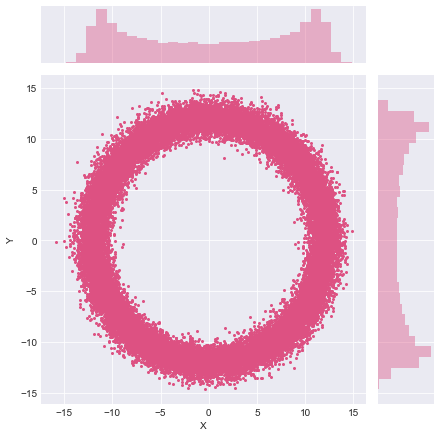

In [23]:
samples = model.sample(30000).detach()
plot_hist(samples)
# plot_contour(model, rng=(-2, 2))

In [24]:
# integrate(model, rng=(-1, 1), n_points=1000000)

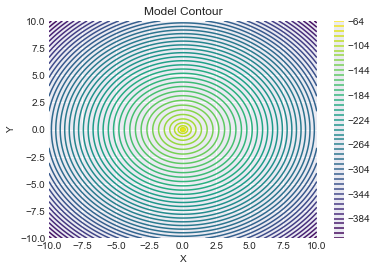

In [25]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [InverseTransform(Radial(2))
                               for _ in range(32)])


plot_contour(model, rng=(-10, 10))

In [26]:
from dpm.train import train
from dpm.criterion import cross_entropy
from dpm.distributions import Data

In [27]:
p = Data(samples)

In [28]:
stats = train(p, model, cross_entropy, epochs=2000, log_interval=100, track_parameters=False)

[Epoch 0/2000]	Loss 350.45
[Epoch 100/2000]	Loss 26.38
[Epoch 200/2000]	Loss 6.05
[Epoch 300/2000]	Loss 5.58
[Epoch 400/2000]	Loss 5.69
[Epoch 500/2000]	Loss 5.80
[Epoch 600/2000]	Loss 5.80
[Epoch 700/2000]	Loss 5.66
[Epoch 800/2000]	Loss 5.59
[Epoch 900/2000]	Loss 5.62
[Epoch 1000/2000]	Loss 5.74
[Epoch 1100/2000]	Loss 5.71
[Epoch 1200/2000]	Loss 5.64
[Epoch 1300/2000]	Loss 5.70
[Epoch 1400/2000]	Loss 5.68
[Epoch 1500/2000]	Loss 5.58
[Epoch 1600/2000]	Loss 5.56
[Epoch 1700/2000]	Loss 5.53
[Epoch 1800/2000]	Loss 5.75
[Epoch 1900/2000]	Loss 5.58


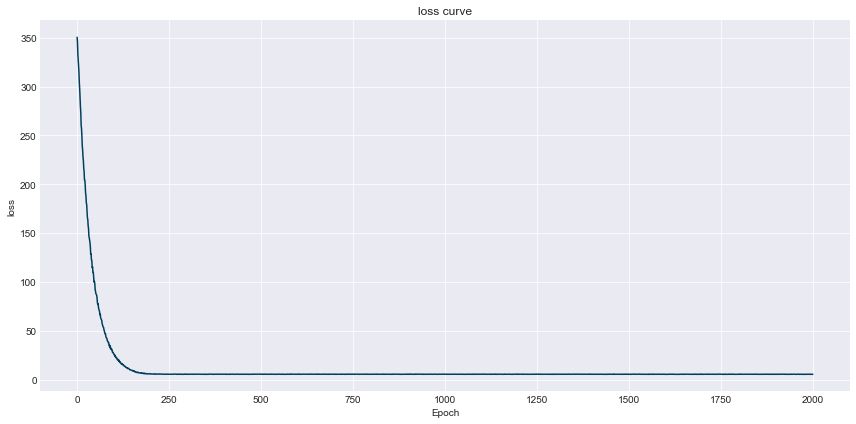

In [29]:
plot_stats(stats)

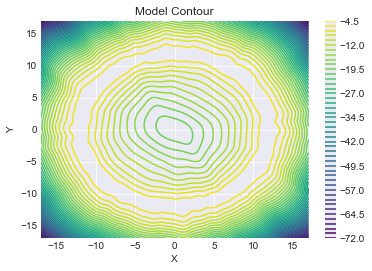

In [36]:
plot_contour(model, rng=(-17, 17))

In [31]:
model = TransformDistribution(Normal([0, 0], [1, 1]), 
                              [InverseTransform(Planar(2))
                               for _ in range(32)])



In [32]:
stats = train(p, model, cross_entropy, epochs=1000, log_interval=100, track_parameters=False)

[Epoch 0/1000]	Loss 109.73
[Epoch 100/1000]	Loss 5.81
[Epoch 200/1000]	Loss 5.72
[Epoch 300/1000]	Loss 5.74
[Epoch 400/1000]	Loss 5.62
[Epoch 500/1000]	Loss 5.66
[Epoch 600/1000]	Loss 5.61
[Epoch 700/1000]	Loss 5.59
[Epoch 800/1000]	Loss 5.65
[Epoch 900/1000]	Loss 5.67


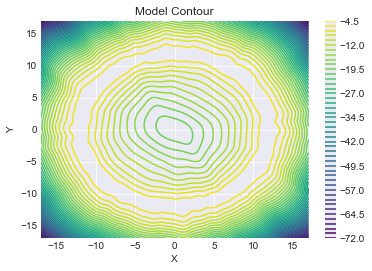

In [37]:
plot_contour(model, rng=(-17, 17))

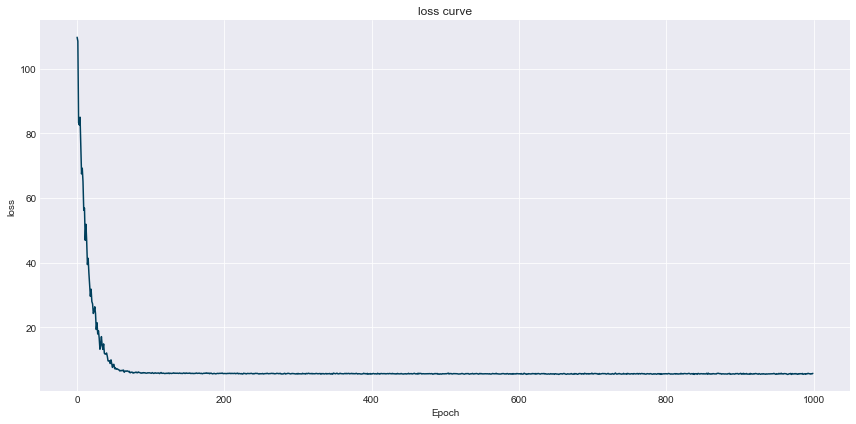

In [34]:
plot_stats(stats)

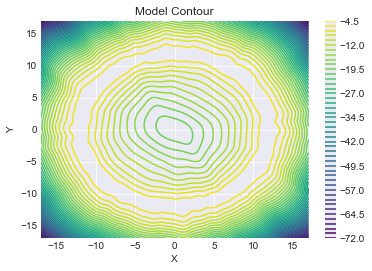

In [38]:
plot_contour(model, rng=(-17, 17))